# Generate Site Specific Plots

### Imports

In [55]:
from datetime import datetime
import os
import pandas as pd
import seaborn as sns

import plotly.graph_objects as p_go
from plotly.subplots import make_subplots as p_subplots

### Initializations

In [56]:
"""
1) Verify file path to trax data is correct
2) Select site from:
    'BCC Bear Trap'
    'BCC Butler'
    'BCC Cardiff'
    'BCC Days Fork'
    'BCC Lake Blanche'
    'BCC Mill D'
    'BCC Mineral Fork'
    'BCC Silver Fork'
    'BCC Willow Heights'
    'LCC Our Lady'
    'LCC Our Lady East'
    'LCC Summer Road'
    'LCC Summer Road 2'
    'LCC White Pine'
    'MCC Porter'
    'MCC Road'
"""

trafx_data_file_path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "raw", "TRAFx_raw.csv"))
site = 'LCC Our Lady'

### Load the trax data

In [79]:
trafx_df = pd.read_csv(trafx_data_file_path)[['Day', site]]
trafx_df.head(5)

,Day,LCC Our Lady
0,2017-12-02,NaN
1,2017-12-03,NaN
2,2017-12-04,0.0
3,2017-12-05,32.0
4,2017-12-06,44.0


### Clean the data

In [80]:
# Convert Day to datetime
trafx_df['Day'] = trafx_df['Day'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [81]:
# Drop all rows with null data
trafx_df.dropna(inplace=True)
trafx_df.head(5)

,Day,LCC Our Lady
0,2017-12-02,NaN
1,2017-12-03,NaN
2,2017-12-04,0.0
3,2017-12-05,32.0
4,2017-12-06,44.0


### Create new dataframe with Season, DayOfWeek, Month, Average Daily Users

In [72]:
# Keep only data between dates requested
start_date = datetime.strptime("{}-12-01".format(season.split("-")[0]), '%Y-%m-%d')
end_date = datetime.strptime("{}-04-30".format(season.split("-")[1]), '%Y-%m-%d')
mask = (trafx_df['Day'] >= start_date) & (trafx_df['Day'] <= end_date)
trafx_df = trafx_df.loc[mask]

trafx_df.reset_index(inplace=True, drop=True)
trafx_df.head(5)

,Day
0,2018-12-01
1,2018-12-02
2,2018-12-03
3,2018-12-04
4,2018-12-05


In [60]:
# Determine how many days had null data and then drop them
n_null = trafx_df[site].isnull().sum()
print("[{}] Season and [{}] Site had [{}] days with no data".format(season, site, n_null))
trafx_df.dropna(inplace=True)
trafx_df.head(5)

[2018-2019] Season and [LCC Our Lady] Site had [1] days with no data


,Day,LCC Our Lady
1,2018-12-02,77.0
2,2018-12-03,93.0
3,2018-12-04,106.0
4,2018-12-05,61.0
5,2018-12-06,57.0


In [67]:
# Create new column that is based on the month
trafx_df['month'] = trafx_df['Day'].apply(lambda x: x.strftime('%b'))
trafx_df.head(5)

,Day,LCC Our Lady,month
1,2018-12-02,77.0,Dec
2,2018-12-03,93.0,Dec
3,2018-12-04,106.0,Dec
4,2018-12-05,61.0,Dec
5,2018-12-06,57.0,Dec


## Create Plotly plot template

In [62]:
# Plot generic shape
fig = p_subplots(rows=3, cols=6, specs=[[{"type": "bar", "rowspan": 3, "colspan": 3}, None, None, {"type": "bar"}, {"type": "bar"}, None],
                                        [None, None, None, {"type": "bar"}, {"type": "bar"}, {"type": "bar"}],
                                        [None, None, None, {"type": "bar"}, {"type": "bar"}, None]])

In [ ]:
fig.add_trace(p_go.b

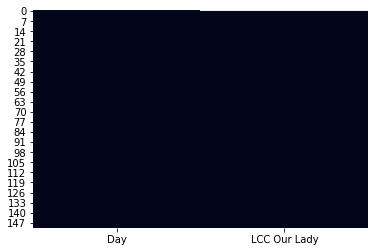

In [36]:
sns.heatmap(trafx_df.isnull(), cbar=False)

In [ ]:






# Create new columns with month as the column
trafx_df['month'] = 

In [9]:
trafx_df.columns

Index(['Day', 'BCC Bear Trap', 'BCC Butler', 'BCC Cardiff', 'BCC Days Fork',
       'BCC Lake Blanche', 'BCC Mill D', 'BCC Mineral Fork', 'BCC Silver Fork',
       'BCC Willow Heights', 'LCC Gate Buttress', 'LCC Our Lady',
       'LCC Our Lady East', 'LCC Summer Road', 'LCC Summer Road 2',
       'LCC White Pine', 'MCC Porter', 'MCC Road'],
      dtype='object')